<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')


In [223]:
import plotly.express as px

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [10]:
df=pd.read_csv('store_sharing.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [17]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [57]:
df.shape

(17414, 10)

In [51]:
df.size

174140

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [45]:
df.empty

False

In [23]:
df.duplicated().sum()

0

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


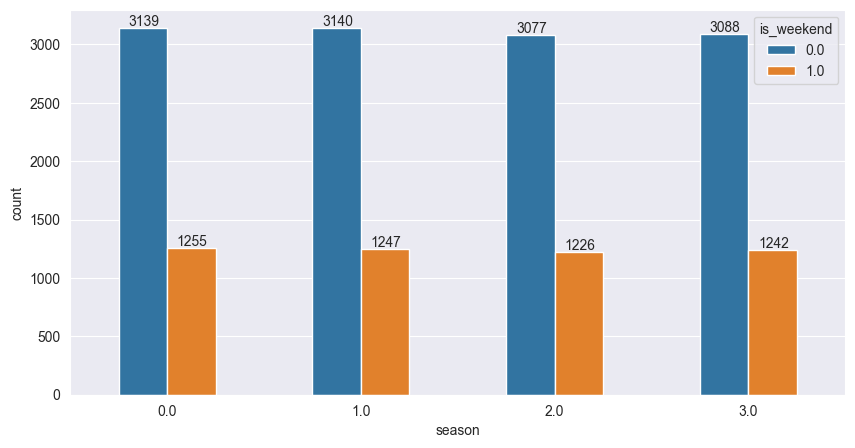

In [94]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='season',hue='is_weekend',width=0.5)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20));

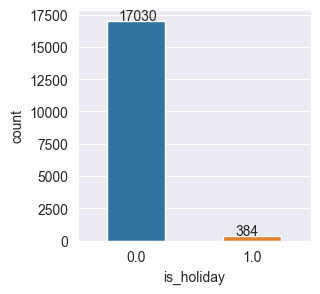

In [90]:
plt.figure(figsize=(3,3))
ax=sns.countplot(data=df,x='is_holiday',width=0.5)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.1, p.get_height()+20));

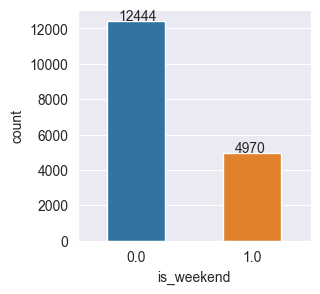

In [95]:
plt.figure(figsize=(3,3))
ax=sns.countplot(data=df,x='is_weekend',width=0.5)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.1, p.get_height()+20));

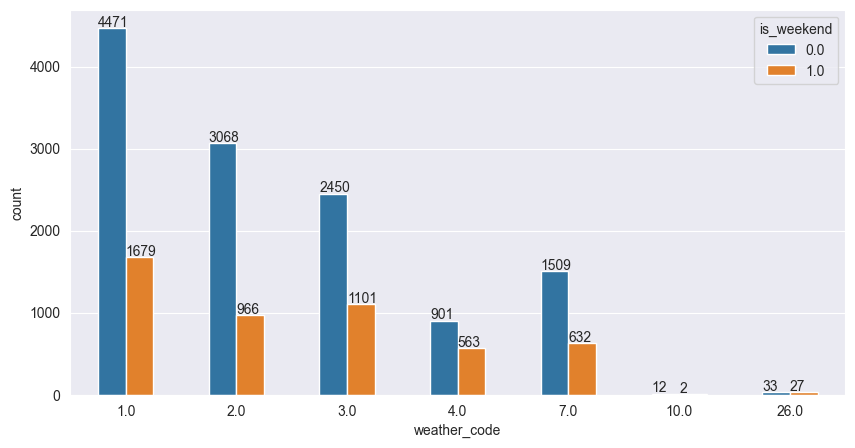

In [97]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='weather_code',hue='is_weekend',width=0.5)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+20));

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [98]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [100]:
df.timestamp=pd.to_datetime(df.timestamp)

In [101]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [104]:
df.set_index('timestamp', inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [106]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [117]:
df['day_of_week']=df.index.day_of_week
df['day_of_month']=df.index.day
df['hour']=df.index.hour
df['month']=df.index.month
df['year']=df.index.year
df['month-year']=df.index.strftime("%m-%Y")
df['name_of_day']=df.index.day_name()


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   day_of_week   17414 non-null  int64  
 10  day_of_month  17414 non-null  int64  
 11  hour          17414 non-null  int64  
 12  month         17414 non-null  int64  
 13  year          17414 non-null  int64  
 14  name_of_day   17414 non-null  object 
 15  month-year    17414 non-null  object 
dtypes: float64(8), int64(6), object(2)
memory usage: 2.8+ MB


In [157]:
df.loc['2015':'2015-01-04 12',['hum','year']]

,hum,year
timestamp,,
2015-01-04 00:00:00,93.0,2015
2015-01-04 01:00:00,93.0,2015
2015-01-04 02:00:00,96.5,2015
2015-01-04 03:00:00,100.0,2015
2015-01-04 04:00:00,93.0,2015
2015-01-04 05:00:00,93.0,2015
2015-01-04 06:00:00,100.0,2015
2015-01-04 07:00:00,100.0,2015
2015-01-04 08:00:00,96.5,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

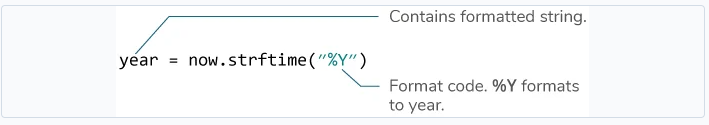

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

/var/folders/s3/_rwrfprd743dqqrrdhmsk9dr0000gn/T/ipykernel_2088/647138927.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


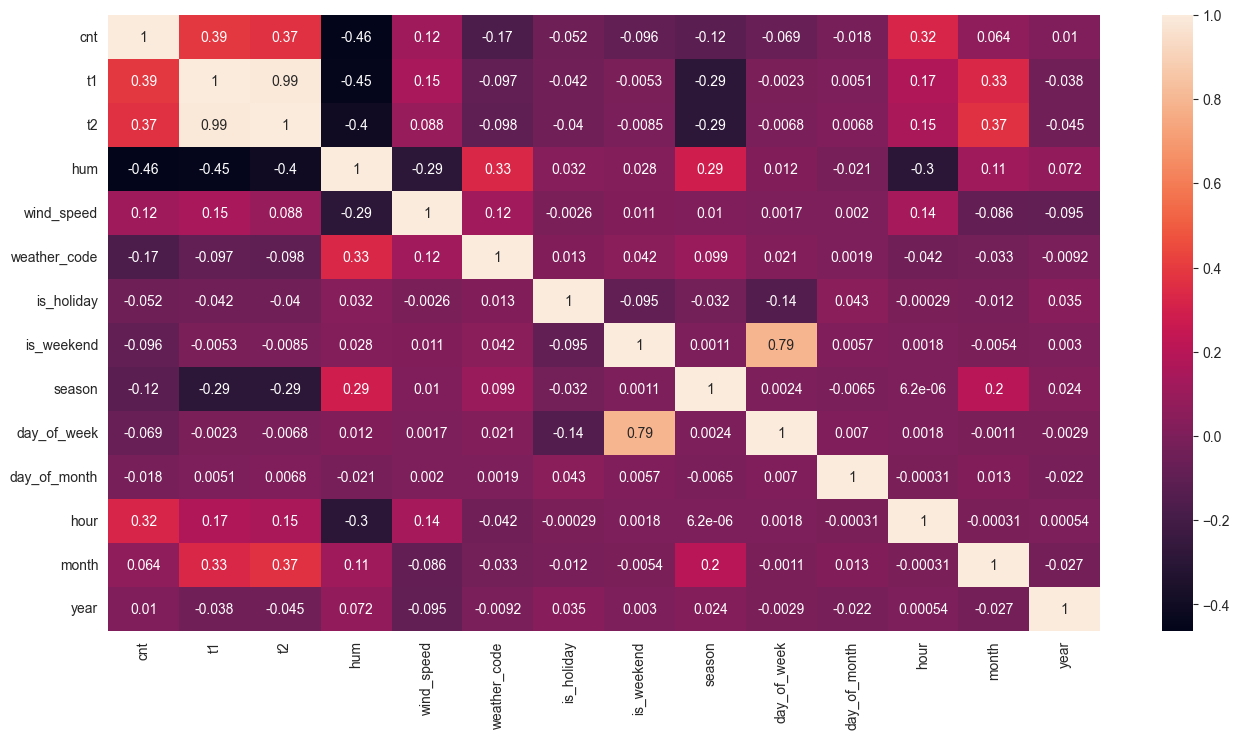

In [175]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True);

In [201]:
cnt_corr=df.corr()[['cnt']].sort_values(by='cnt',ascending=False)

/var/folders/s3/_rwrfprd743dqqrrdhmsk9dr0000gn/T/ipykernel_2088/4109921646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cnt_corr=df.corr()[['cnt']].sort_values(by='cnt',ascending=False)


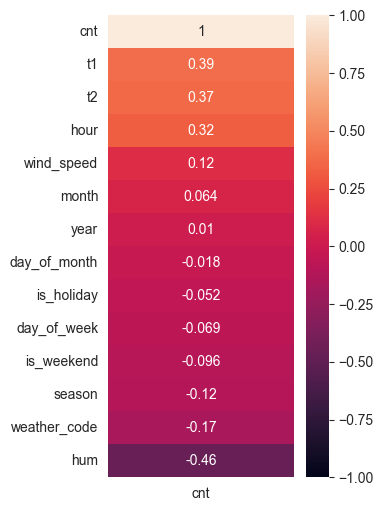

In [211]:
plt.figure(figsize=(3,6))
sns.heatmap(data=cnt_corr,annot=True,vmin=-1,vmax=1);

/var/folders/s3/_rwrfprd743dqqrrdhmsk9dr0000gn/T/ipykernel_2088/2787325754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cnt_corr1=df.corr()[['t1']].sort_values(by='t1',ascending=False)


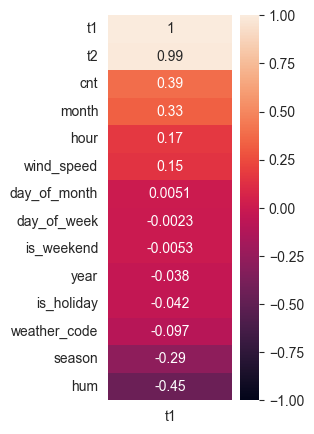

In [213]:
plt.figure(figsize=(2,5))
cnt_corr1=df.corr()[['t1']].sort_values(by='t1',ascending=False)
sns.heatmap(data=cnt_corr1,annot=True,vmin=-1,vmax=1);

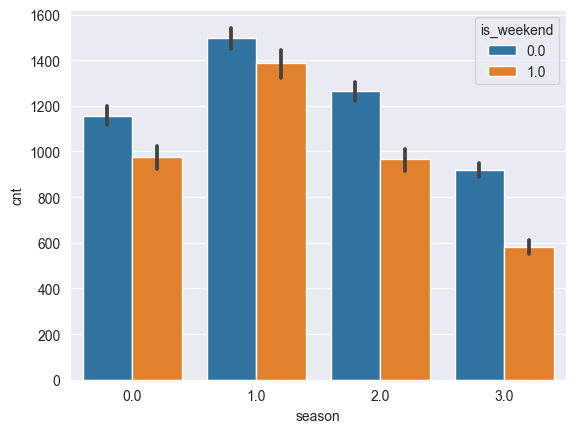

In [191]:
sns.barplot(data=df,x='season',y='cnt',hue='is_weekend');

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

/var/folders/s3/_rwrfprd743dqqrrdhmsk9dr0000gn/T/ipykernel_2088/378328109.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



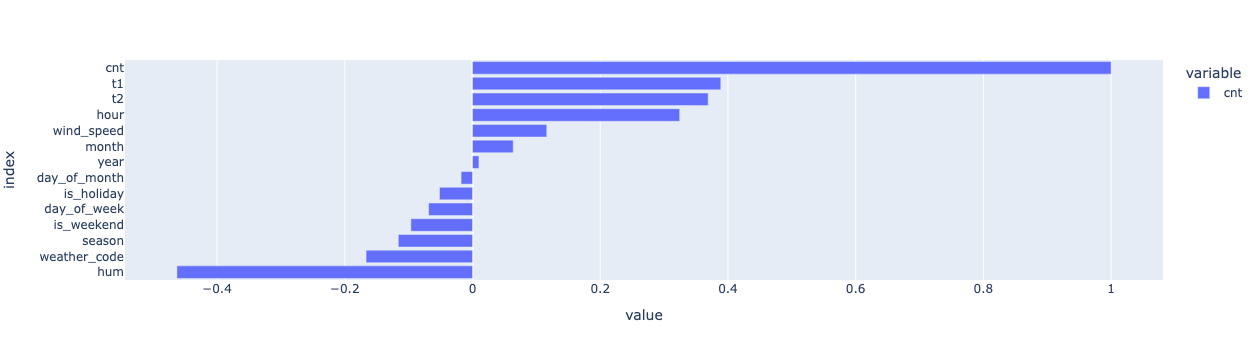

In [240]:
cnt_corr=df.corr()[['cnt']].sort_values(by='cnt',ascending=True)
px.bar(cnt_corr,orientation='h')

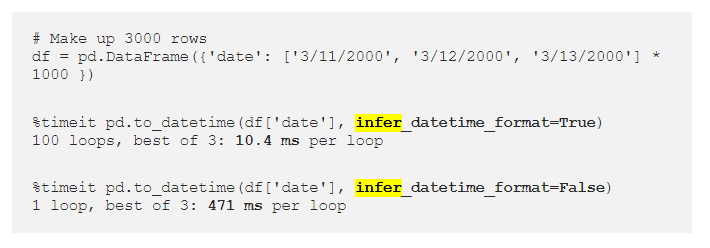

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

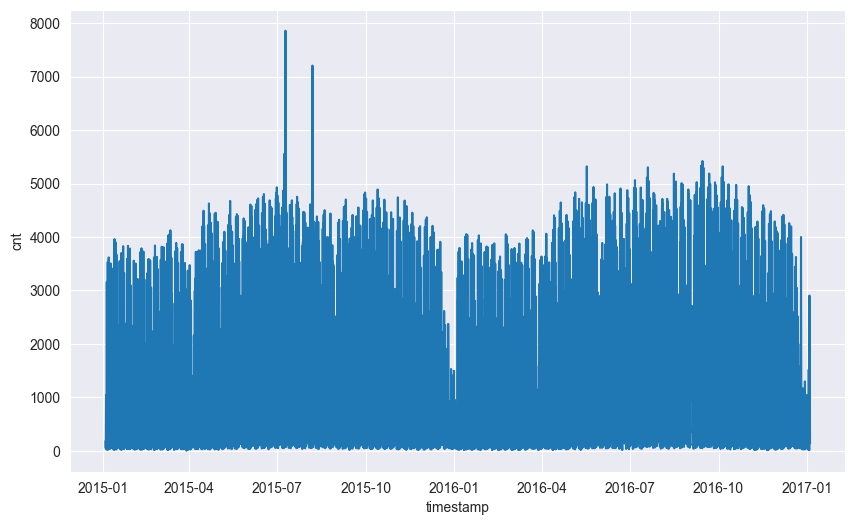

In [250]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='timestamp',y='cnt');

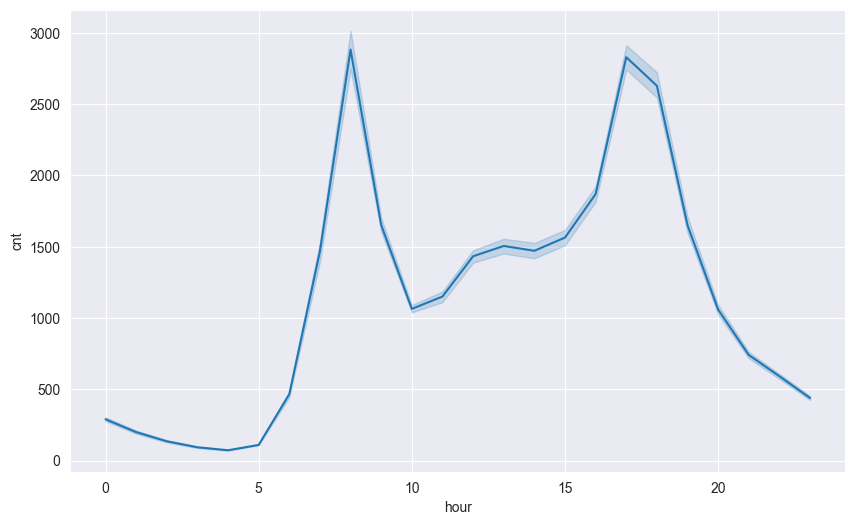

In [252]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='hour',y='cnt');

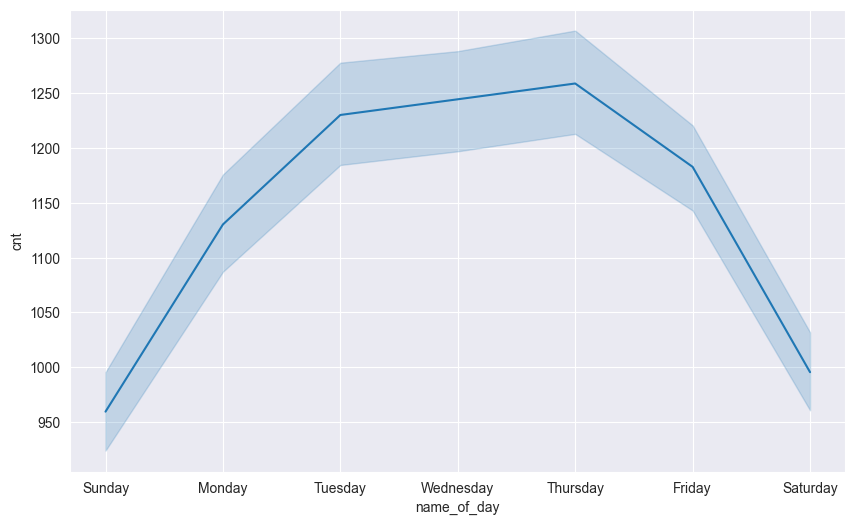

In [253]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='name_of_day',y='cnt');

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

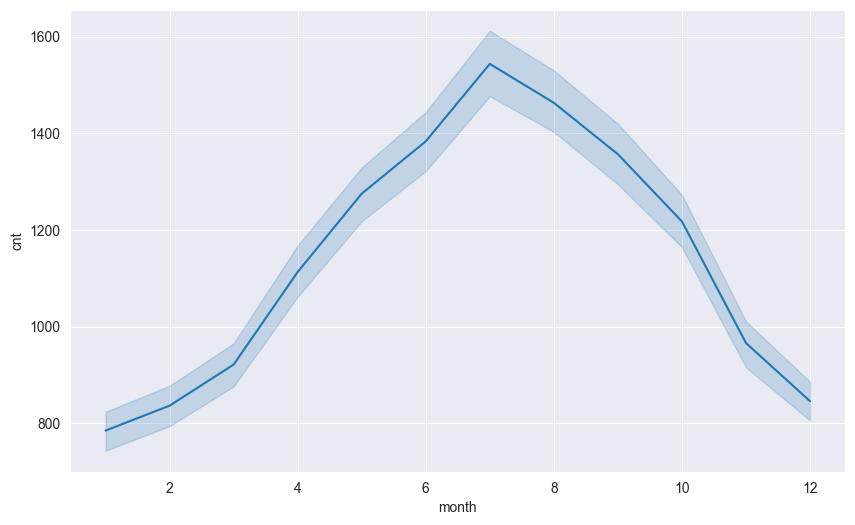

In [254]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='month',y='cnt');

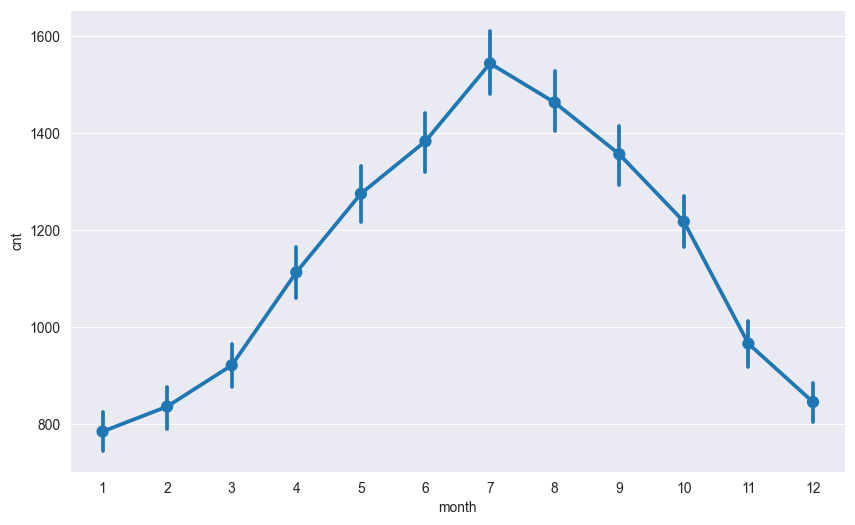

In [256]:
plt.figure(figsize=(10,6))
sns.pointplot(data=df,x='month',y='cnt');

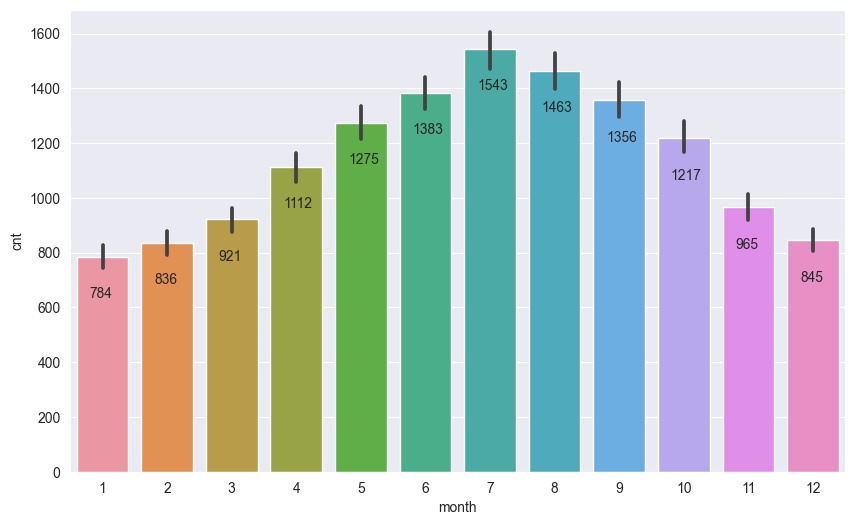

In [271]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x='month',y='cnt')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.2, p.get_height()-150));


In [303]:
a.sort_values(by='month-year',ascending=False)

,cnt
month-year,
12-2016,651908
12-2015,602838
11-2016,703859
11-2015,677332
10-2016,935706
10-2015,865046
09-2016,998619
09-2015,892478
08-2016,1137314


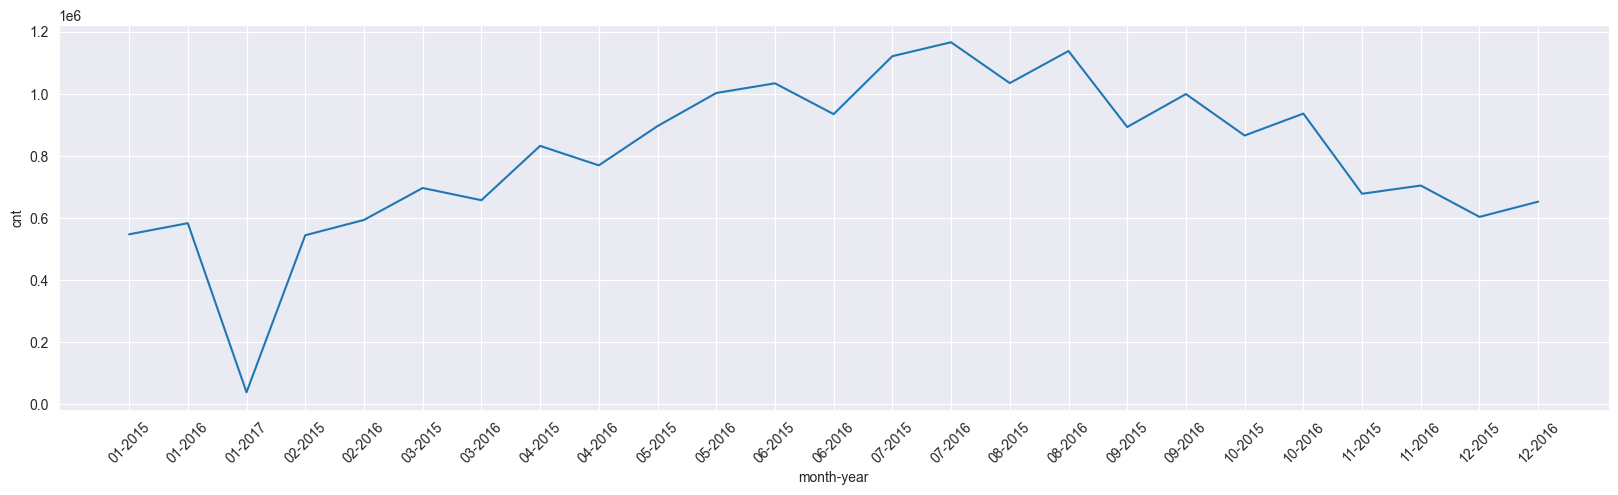

In [301]:
a=pd.DataFrame(df.groupby("month-year").cnt.sum())
a.sort_values(by='month-year',ascending=True)
plt.figure(figsize=(20,5))
sns.lineplot(x="month-year",y="cnt", data = a)
plt.xticks(rotation=45);

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

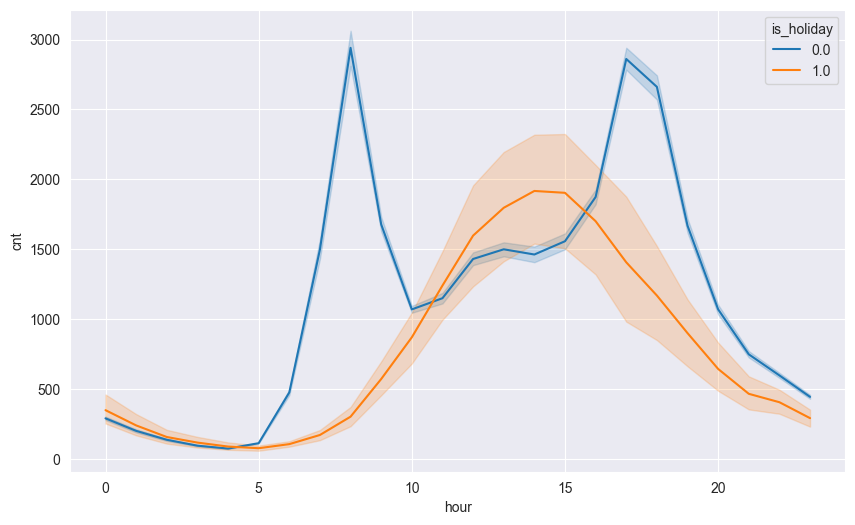

In [304]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='hour',y='cnt',hue='is_holiday');

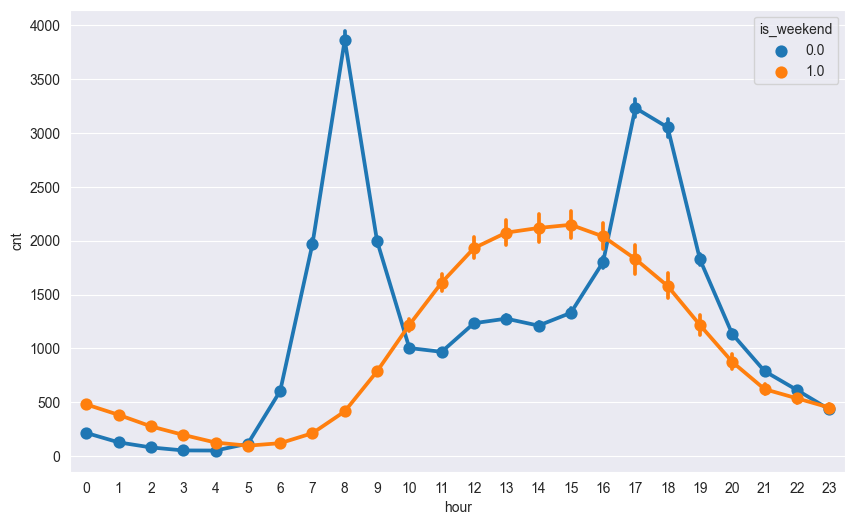

In [306]:
plt.figure(figsize=(10,6))
sns.pointplot(data=df,x='hour',y='cnt',hue='is_weekend');

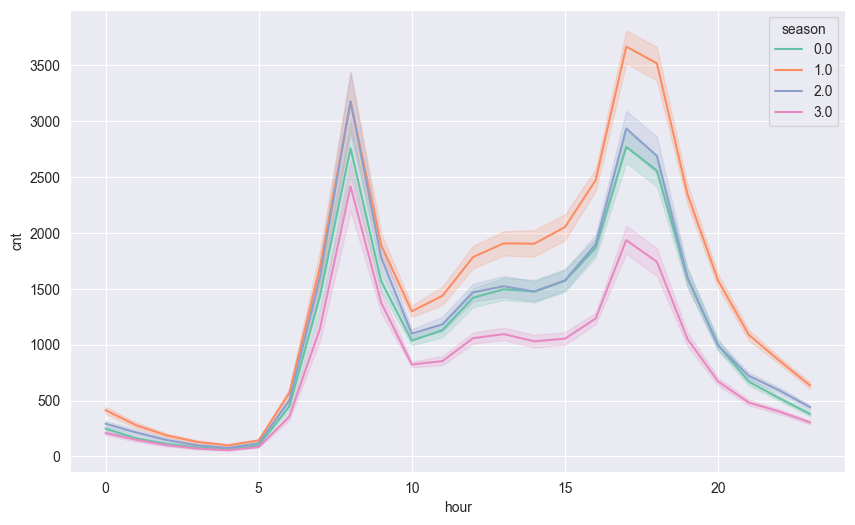

In [313]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='hour',y='cnt',hue='season',palette='Set2');

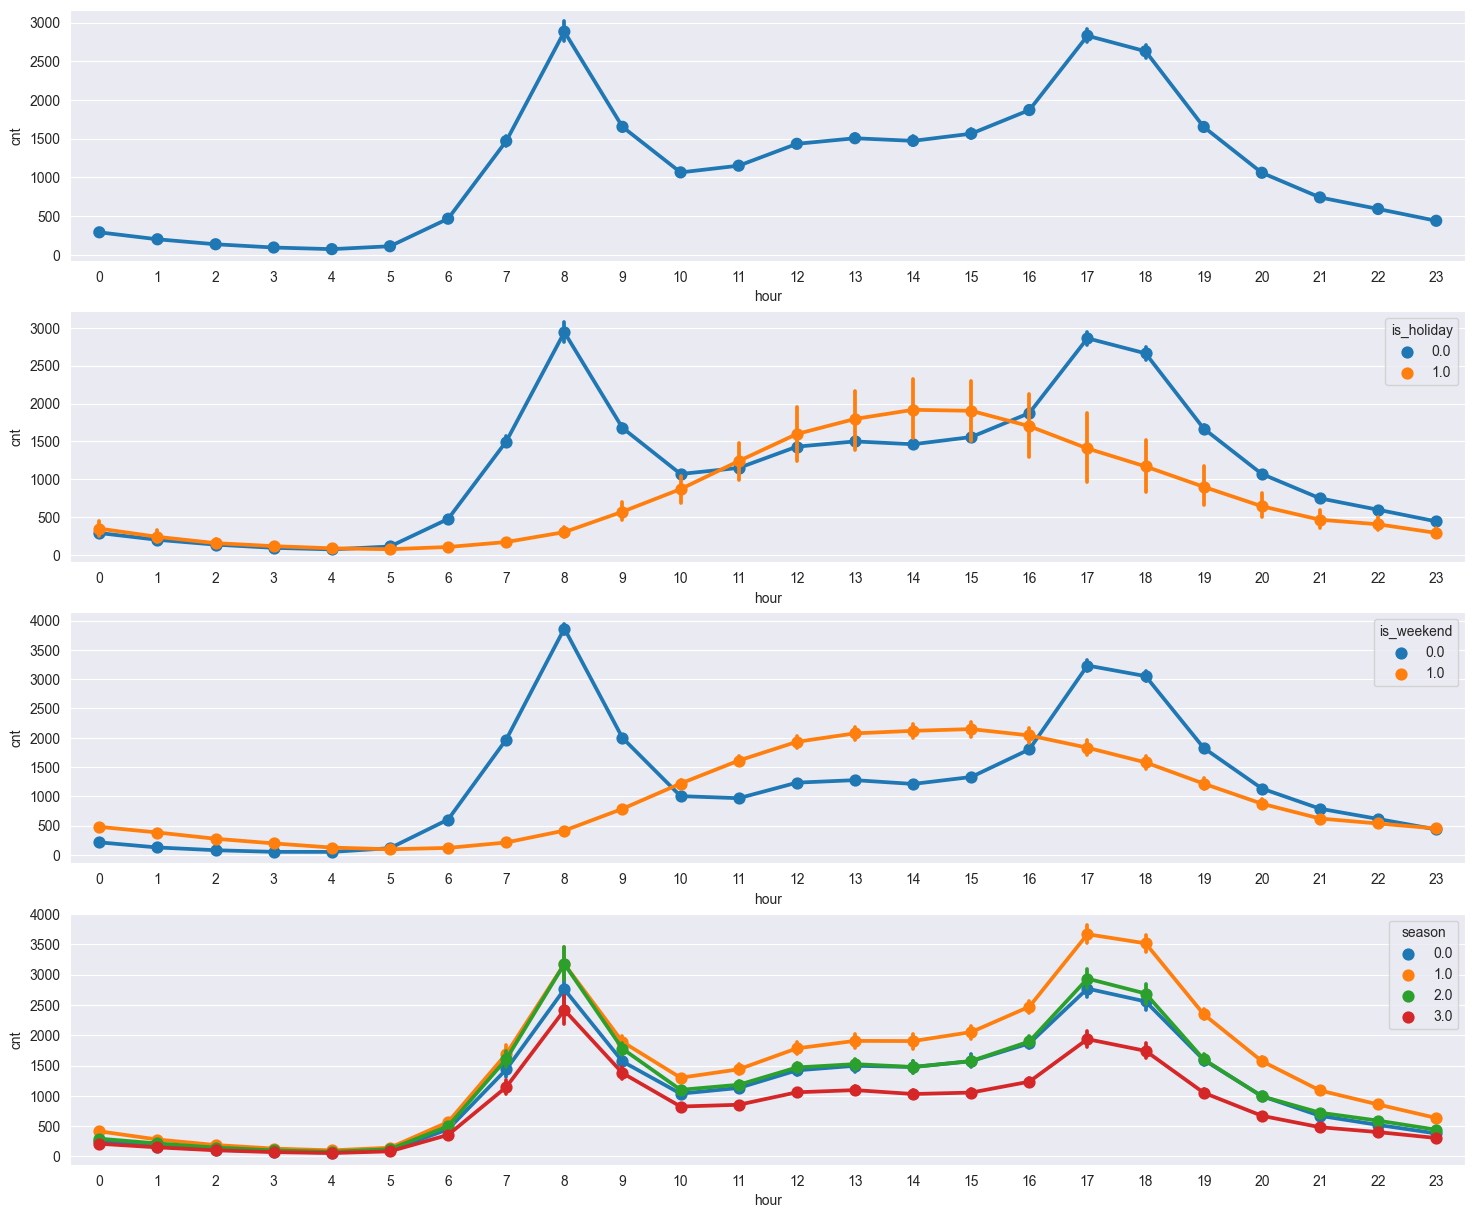

In [319]:
fig, ax = plt.subplots(ncols=1, nrows=4, figsize = (18,15))

sns.pointplot(data=df, x="hour", y="cnt", ax = ax[0])
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[1], hue="is_holiday")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[2], hue="is_weekend")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[3], hue="season");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

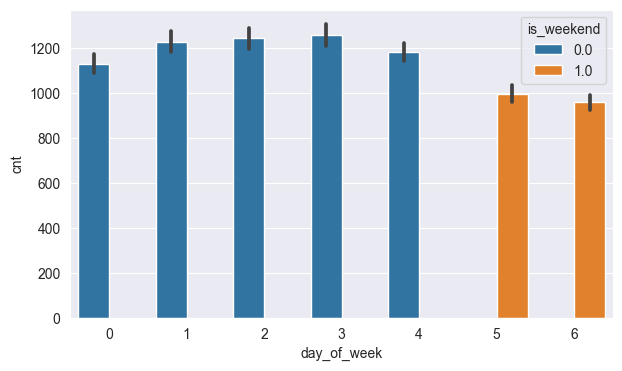

In [358]:
plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend");

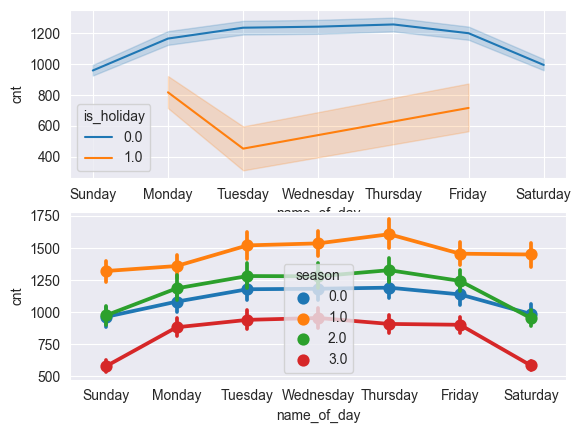

In [343]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (18,15))

sns.lineplot(data=df,x='name_of_day',y='cnt',hue='is_holiday',ax=ax[0])
sns.pointplot(data=df, x="name_of_day", y="cnt", ax = ax[1], hue="season");


In [335]:
df.is_holiday.value_counts().loc[1]

384

In [338]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year,name_of_day,month-year
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,6,4,0,1,2015,Sunday,01-2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,6,4,1,1,2015,Sunday,01-2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,6,4,2,1,2015,Sunday,01-2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,6,4,3,1,2015,Sunday,01-2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,6,4,4,1,2015,Sunday,01-2015


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

<AxesSubplot: xlabel='day_of_month', ylabel='cnt'>

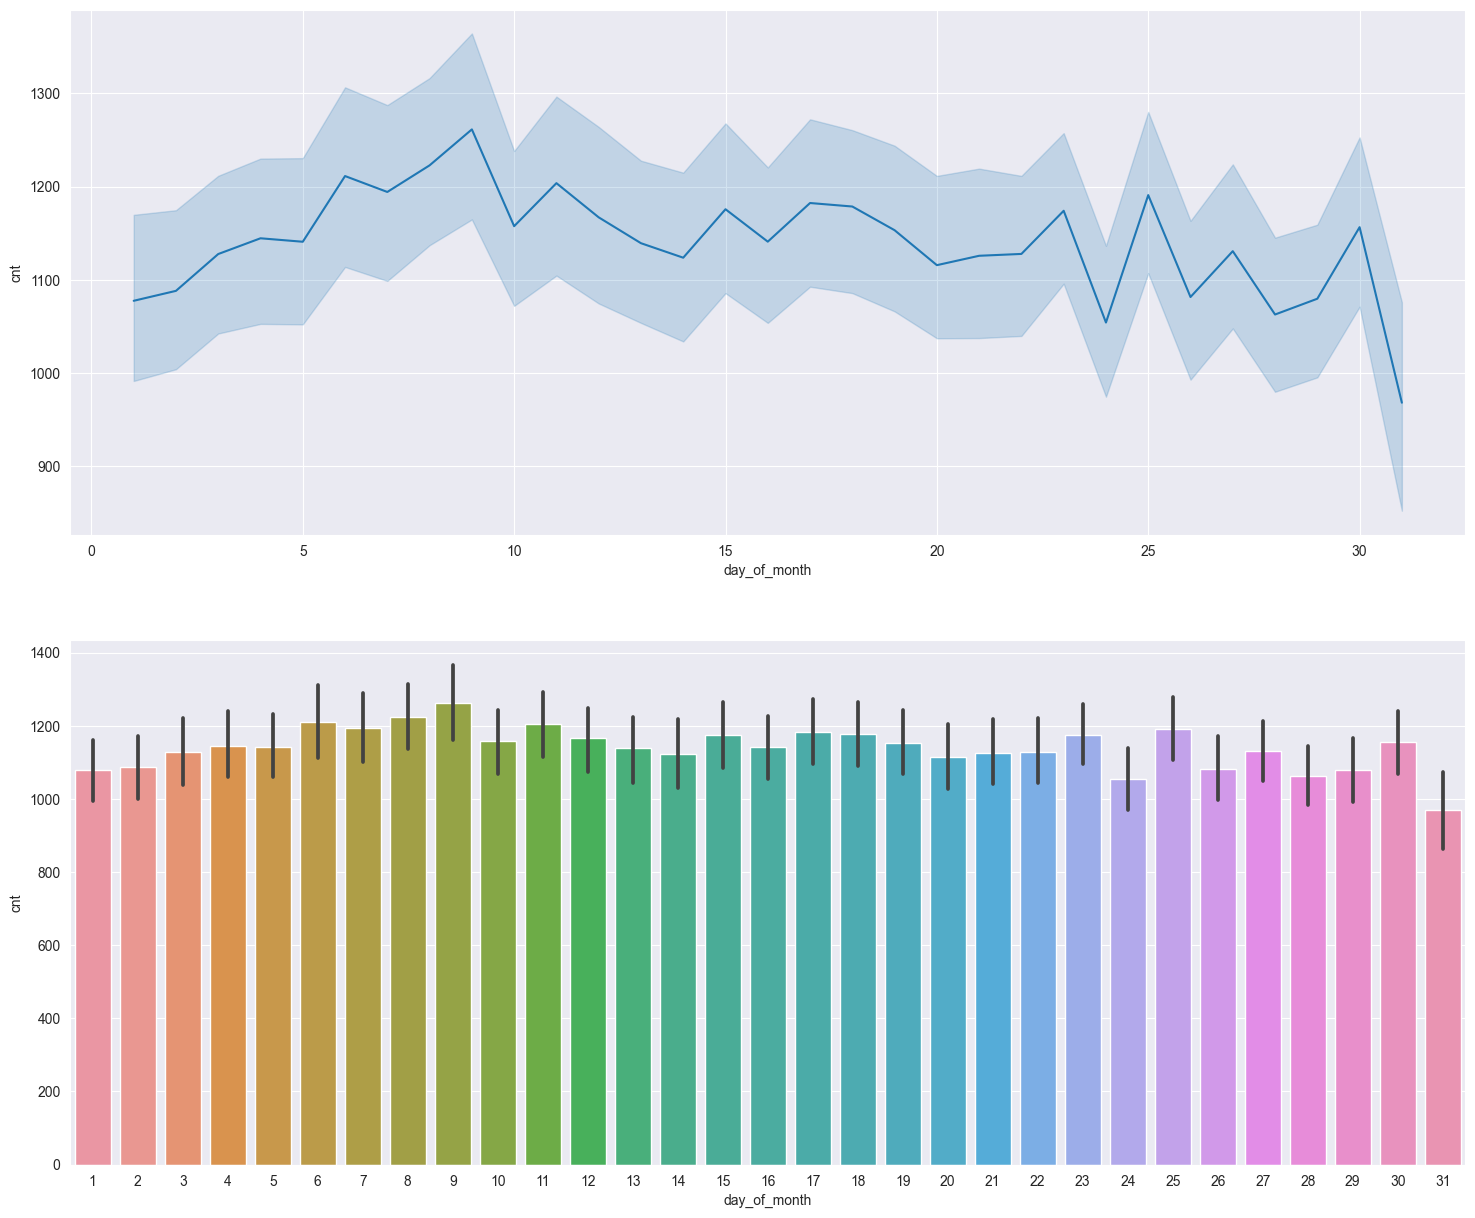

In [354]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (18,15))
sns.lineplot(data=df,x='day_of_month',y='cnt',ax=ax[0])
sns.barplot(data=df,x='day_of_month',y='cnt',ax=ax[1])

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

<AxesSubplot: xlabel='year', ylabel='cnt'>

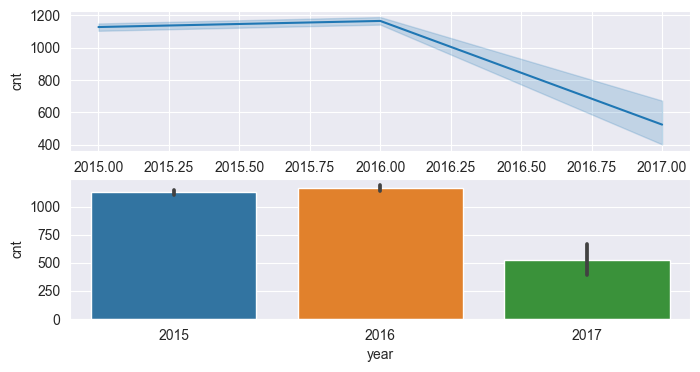

In [357]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (8,4))
sns.lineplot(data=df,x='year',y='cnt',ax=ax[0])
sns.barplot(data=df,x='year',y='cnt',ax=ax[1])

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

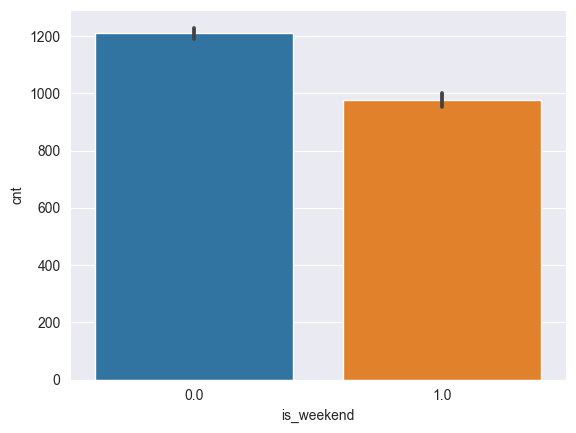

In [360]:
sns.barplot(data=df,x='is_weekend',y='cnt');

In [367]:
b=df.is_weekend.value_counts(normalize=True)
b

0.0    0.714597
1.0    0.285403
Name: is_weekend, dtype: float64

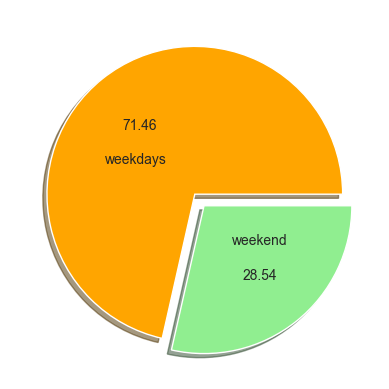

In [388]:
plt.pie(b,labels=['weekdays','weekend'],autopct ="%.2f",labeldistance=0.3,explode=[0,0.1],shadow=True,colors=['orange','lightgreen']);

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

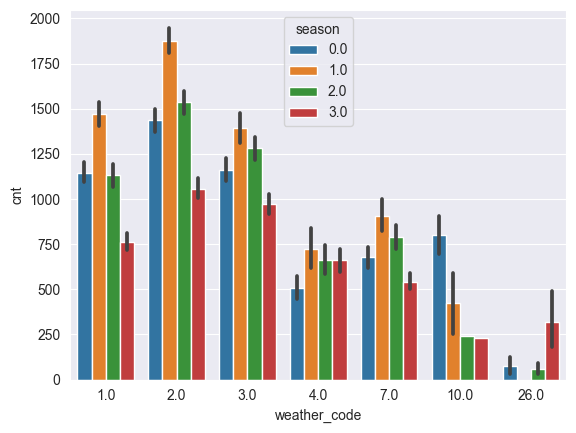

In [374]:
sns.barplot(data=df,x='weather_code',y='cnt',hue='season');

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

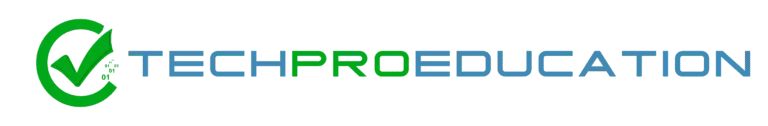